In [1]:
!pip install -q kaggle 

In [2]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ihebbouariche","key":"65b046214dca53420428236203d2b8c0"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json 

In [6]:
! kaggle datasets list 

ref                                                             title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                              Data Science Job Salaries                        7KB  2022-06-15 08:59:12          21608        670  1.0              
josephcheng123456/olympic-historical-dataset-from-olympediaorg  Olympic Historical Dataset From Olympedia.org   25MB  2022-08-18 14:18:14            708         27  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts             McDonald's India : Menu Nutrition Dataset        5KB  2022-07-28 17:08:52           1845         96  0.9411765        
gpreda/life-expectancy-in-europe-by-age-and-sex                 Life Expectancy in Eu

In [7]:
!kaggle datasets download -d alessiocorrado99/animals10

 94% 549M/586M [00:02<00:00, 338MB/s]
100% 586M/586M [00:02<00:00, 283MB/s]


In [8]:
import zipfile 

#unzip
local_zip = './animals10.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()

zip_ref.close()

In [9]:
import os
#base path
base_dir = os.path.join('./raw-img')
os.listdir(base_dir)       #base_dir contents
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

In [10]:
#animals directory paths  
os.rename('/content/raw-img/elefante','/content/raw-img/elephant')
os.rename('/content/raw-img/cane','/content/raw-img/dog')
os.rename('/content/raw-img/farfalla','/content/raw-img/butterfly')
os.rename('/content/raw-img/cavallo','/content/raw-img/horse')
os.rename('/content/raw-img/gallina','/content/raw-img/chicken')
os.rename('/content/raw-img/gatto','/content/raw-img/cat')
os.rename('/content/raw-img/mucca','/content/raw-img/cow')
os.rename('/content/raw-img/pecora','/content/raw-img/sheep')
os.rename('/content/raw-img/ragno','/content/raw-img/spider')
os.rename('/content/raw-img/scoiattolo','/content/raw-img/squirrel')
butterfly_dir = os.path.join('./raw-img/butterfly')
cat_dir = os.path.join('./raw-img/cat')
chicken_dir = os.path.join('./raw-img/chicken')
cow_dir = os.path.join('./raw-img/cow')
dog_dir = os.path.join('./raw-img/dog')
elephant_dir = os.path.join('./raw-img/elephant')
horse_dir = os.path.join('./raw-img/horse')
squirrel_dir = os.path.join('./raw-img/squirrel')
sheep_dir = os.path.join('./raw-img/sheep')
spider_dir = os.path.join('./raw-img/spider')

In [11]:
#number of files
len(os.listdir(cat_dir))

1668

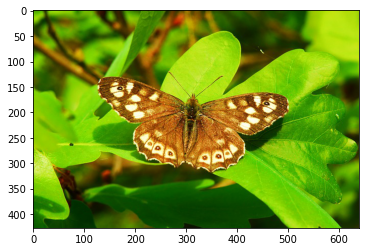

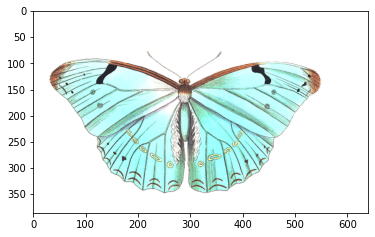

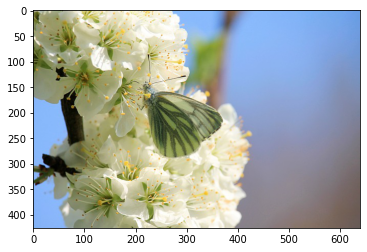

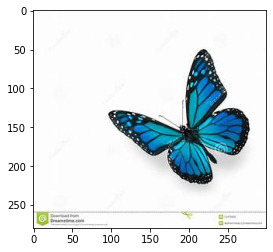

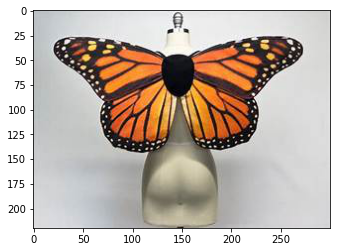

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

next_butterfly_pic = [os.path.join(butterfly_dir,fname)
                      for fname in os.listdir(butterfly_dir)]

for i in range(5,10):

 image = mpimg.imread(next_butterfly_pic[i])
 plt.imshow(image)
 plt.show()


In [13]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [44]:
model = keras.Sequential([
    layers.Conv2D(128,3,activation='relu',input_shape = (150,150,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(264,3,activation='relu'), 
    layers.MaxPooling2D(),
    layers.Conv2D(512,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(264,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 264)       304392    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 264)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 512)       1217024   
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 512)     

In [46]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"]
     )

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rescale=1.0/255,
                               rotation_range = 40,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
image_data = image_gen.flow_from_directory (base_dir,batch_size=20,class_mode = 'categorical' , target_size=(150,150))

Found 26179 images belonging to 10 classes.


In [49]:
history = model.fit(image_data,epochs=10)

Epoch 1/10
1309/1309 [==============================] - 217s 166ms/step - loss: 1.4804 - accuracy: 0.4924
Epoch 2/10
1309/1309 [==============================] - 216s 165ms/step - loss: 1.2723 - accuracy: 0.5635
Epoch 3/10
1309/1309 [==============================] - 214s 163ms/step - loss: 1.1672 - accuracy: 0.5970
Epoch 4/10
1309/1309 [==============================] - 216s 165ms/step - loss: 1.0689 - accuracy: 0.6365
Epoch 5/10
1309/1309 [==============================] - 218s 167ms/step - loss: 0.9977 - accuracy: 0.6588
Epoch 6/10
1309/1309 [==============================] - 218s 167ms/step - loss: 0.9335 - accuracy: 0.6828
Epoch 7/10
1309/1309 [==============================] - 218s 167ms/step - loss: 0.8766 - accuracy: 0.7018
Epoch 8/10
1309/1309 [==============================] - 223s 171ms/step - loss: 0.8349 - accuracy: 0.7143
Epoch 9/10
1309/1309 [==============================] - 226s 173ms/step - loss: 0.7923 - accuracy: 0.7335
Epoch 10/10
1309/1309 [=======================

<Figure size 432x288 with 0 Axes>

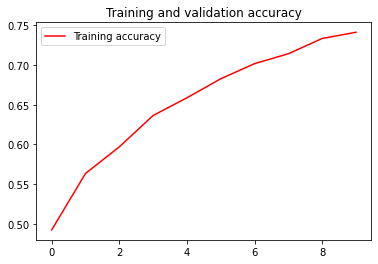

<Figure size 432x288 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


In [83]:
# evaluate from extern data 
#import image of an animal and test your model 
import numpy as np 
from google.colab import files
from keras.preprocessing import image 

uploaded = files.upload()      #import your file 
dic = ["butterfly" ,"cat" , "chicken" , "cow" , "dog" , "elephant" , "horse" , "sheep" , "spider" , "squirrel"]
for fn in uploaded.keys() : 
  path = fn 
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  images = np.expand_dims(x, axis=0)      #from ([1,2]) to ([[1,2]]) #from shape (,2) to (1,2)
  classes = model.predict(images)
  i =  argmax(classes).numpy()
  i = int(i)
  print(dic[i])

Saving 1280px-Cow_female_black_white.jpg to 1280px-Cow_female_black_white (2).jpg
cow


In [ ]:
#we sew in the figure that the accuracy steel increesing with a huge amount and achieved 75% of accuracy in just 10 epochs so it's need to be  more trained 
#for more performance increase the number of epochs and train this model for long time (we trained this model for only 10 epochs)
#more training it will take more time (hours)
